In [1]:
import matplotlib.pyplot as plt
import time as tm
import numpy as np
import math as mt
import random as rn

Смоделировать выборку объема 1000 из дискретного распределения на множестве цифр 0, 1, 2, ..., 9 с весами 0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2. По выборке построить гистограмму. Оптимизируйте алгоритм, упорядочив веса. Сравните время генерации выборки с неупорядоченными и упорядоченными весами.

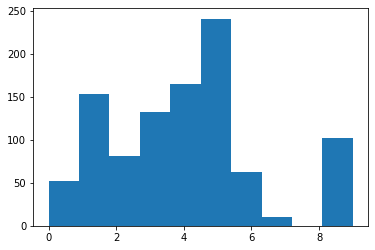

elapsed: 0.0009980201721191406


In [2]:
arr = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
s_t = tm.time()
arr_1 = arr / arr.sum()
arr_1 = arr_1.cumsum()
rnd = np.random.rand(1000)
random = np.searchsorted(arr_1, rnd)
e_t = tm.time()
plt.hist(random)
plt.show()
print('elapsed:', e_t - s_t)

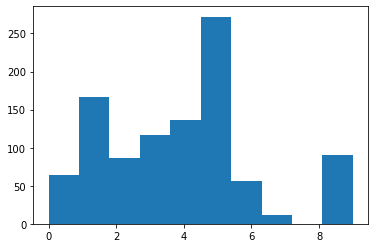

elapsed: 0.0009822845458984375


In [3]:
s_t = tm.time()
arr_2 = np.sort(arr)
ind = np.argsort(arr)
arr_2 /= arr_2.sum()
arr_2 = arr_2.cumsum()
rnd = np.random.rand(1000)
random = ind[np.searchsorted(arr_2, rnd)]
e_t = tm.time()
plt.hist(random)
plt.show()
print('elapsed:', e_t - s_t)

Смоделируйте выборку размера 1000 из распределения  Exp(λ) . Постройте выборочную гистограмму и точный график плотности распределения.

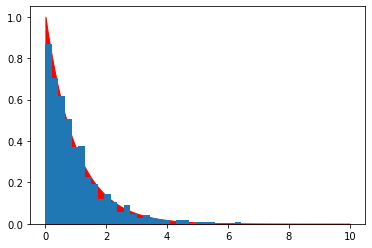

In [4]:
lam = 1
rnd = np.random.rand(1000)
random = [-1 / lam * np.log(1 - rnd[i]) for i in range(1000)]
plt.hist(random, bins = 30, density = True)

X = np.linspace(0, 10, 256)
D = lam * np.exp(-lam * X)
plt.fill_between(X, 0, D, color = 'r')
plt.show()

Обоснуйте, что метод accept-reject действительно производит выборку из нужного распределения. Смоделируйте 1000 точек из усеченного распределения Коши, приведенного ниже, используя генератор равномерного распределения. Нарисуйте график полученной выборочной гистограммы и сравните его с графиком точной функции плотности.

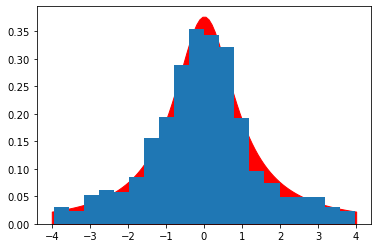

In [5]:
k = 1 / (2 * mt.atan(4))
n = 0
res = []
while(n < 1000):
    x = rn.uniform(-4, 4)
    y = rn.uniform(0, k)
    if(y < k / (1 + x * x)):
        res.append(x)
        n += 1
plt.hist(res, bins = 20, density = True)

X = np.linspace(-4, 4, 100)
D = k / (1 + X ** 2)
plt.fill_between(X, 0, D, color = 'r')
plt.show()

Смоделировать выборку из 500 точек равномерно распределенных внутри данного треугольника без использования метода отбора.

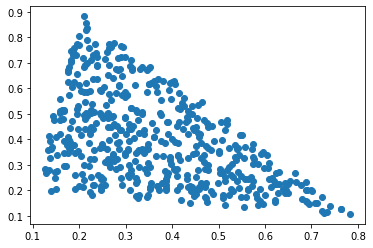

In [6]:
rnd_0 = np.random.rand(500)
rnd_1 = np.array([(1 - mt.sqrt(1 - rnd_0[i])) for i in range(500)]) #абсциссы случайно распределённых точек из треугольника с вершинами (0, 0), (1, 0) и (1, 1)
rnd_2 = np.random.rand(500) * (1 - rnd_1) #ординаты этих точек
rnd_x = 0.1 + 0.7 * rnd_1 + 0.1 * rnd_2 #абсциссы после аффинного преобразования
rnd_y = 0.2 - 0.1 * rnd_1 + 0.7 * rnd_2 #то же для ординат
plt.scatter(rnd_x, rnd_y)
plt.show()

Смоделировать выборку из 500 точек внутри данного круга без использования метода отбора.

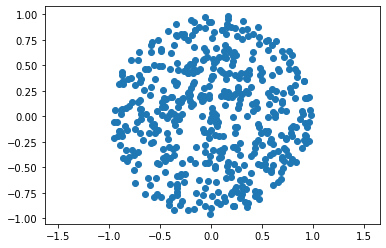

In [7]:
rnd_r = np.sqrt(np.random.rand(500)) #радиусы "равномерно" распределённых точек
rnd_phi = np.random.rand(500) * 2 * np.pi #полярные углы
plt.scatter(rnd_r * np.cos(rnd_phi), rnd_r * np.sin(rnd_phi))
plt.axis('equal')
plt.show()

Напишите функцию, которая моделирует случайное симметричное блуждание на двумерной решетке длины n c началом и концом в точке (0, 0). Приведите графики выборочных траекторий для n=100.

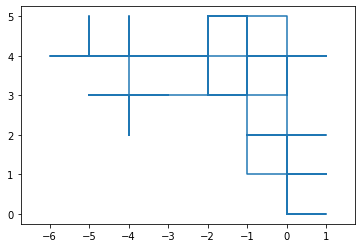

In [8]:
rnd_1 = np.sort(np.random.randint(0, 51, 50)) + np.arange(50)
rnd_2 = np.sort(np.random.randint(0, 51, 50)) + np.arange(50)
rnd_3 = np.full(100, 1)
rnd_3[rnd_1] = -1
rnd_4 = np.full(100, 1)
rnd_4[rnd_2] = -1
rnd_3 = rnd_3.cumsum()
rnd_4 = rnd_4.cumsum()
rnd_x = (rnd_3 + rnd_4) / 2
rnd_y = (rnd_3 - rnd_4) / 2
np.insert(rnd_x, 0, 0)
np.insert(rnd_y, 0, 0)
plt.plot(rnd_x, rnd_y)
plt.axis('equal')
plt.show()

Докажите, что приведенный ниже алгоритм (Box-Muller algorithm) формирует выборку из независимых N(0,1) случаных величин. Модифицируйте метод, чтобы исключить вызовы тригонометрических функций np.sin и np.cos. С помощью модифицированного метода смоделируйте выборку объема 1000 из двумерного гауссовского распределения со средним (3, 6) и ковариационной матрицей ((2, 1), (1, 4)). Постройте 2D гистограмму полученного распределения.

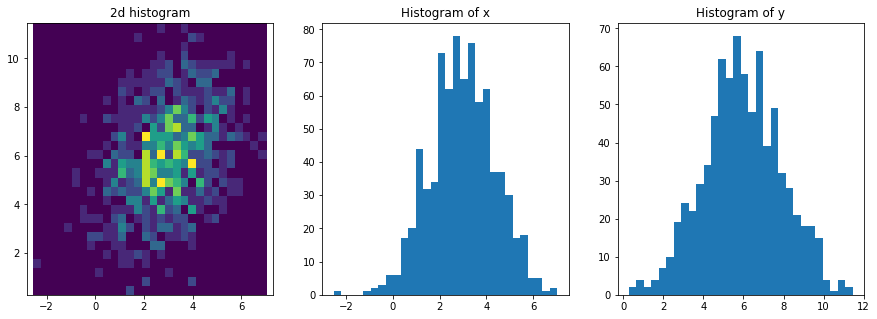

In [9]:
n = 0
x = []
y = []
while(n < 1000):
    u= rn.uniform(-1, 1)
    v = rn.uniform(-1, 1)
    s = u * u + v * v
    if(s > 0 and s <= 1):
        x.append(u * mt.sqrt(-2 * mt.log(s) / s))
        y.append(v * mt.sqrt(-2 * mt.log(s) / s))
    n += 1
x = np.array(x)
y = np.array(y)
#получили N(0, E), домножим на матрицу 
#sqrt(2)   0
#1/sqrt(2) sqrt(7 / 2)
y *= mt.sqrt(7 / 2)
y += 1 / mt.sqrt(2) * x
x *= mt.sqrt(2)
#теперь сместим
x += 3
y += 6
fig, ax = plt.subplots(1, 3, figsize = (15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

Перейдите от вектора из независимых стандартных нормальных величин к гауссовскому вектору с нулевым средним и заданной ниже ковариационно матрицей. Обоснуйте теоретически и численно, что полученный вектор обладает требуемой ковариационной матрицей.

In [10]:
B = np.array([[ 2.,  0.,  0.,  0., -1.,  0.,  0.,  0., -1.],
              [ 0.,  4.,  0., -1.,  0.,  0.,  0.,  0.,  0.],
              [ 0.,  0.,  4.,  0.,  0.,  0., -1.,  0.,  0.],
              [ 0., -1.,  0.,  4.,  0.,  0.,  0.,  0.,  0.],
              [-1.,  0.,  0.,  0.,  2.,  0.,  0.,  0., -1.],
              [ 0.,  0.,  0.,  0.,  0.,  4.,  0., -1.,  0.],
              [ 0.,  0., -1.,  0.,  0.,  0.,  4.,  0.,  0.],
              [ 0.,  0.,  0.,  0.,  0., -1.,  0.,  4.,  0.],
              [-1.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  2.]])
print(np.linalg.det(B))
print(np.linalg.det(B[np.arange(8)][:, np.arange(8)]))

0.0
10125.000000000007


Видим, что B вырождена, её угловой минор 8 х 8 положителен, значит сначала сначала разложим её по методу Холецкого.

In [11]:
A = np.zeros((9, 9))
A8 = np.linalg.cholesky(B[np.arange(8)][:, np.arange(8)])

В матрице B последняя строка равна минус сумме первой и пятой, поэтому в матрице A сделаем последнюю строку равной минус сумме первой и пятой (непосредственная проверка показывает, что A*A^T=B).

In [12]:
for i in range(8):
    for j in range(8):
        A[i, j] = A8[i, j]
A[8] = -A[0] - A[4]

Осталось сгенерировать выборку.

In [13]:
rnd_1 = np.random.normal(size = (9, 1000000))
rnd_2 = np.dot(A, rnd_1)
print(np.cov(rnd_2))
print(np.linalg.norm(np.cov(rnd_2) - B, ord = 1))

[[ 1.99943402e+00 -1.51876798e-03 -1.74782824e-03  3.42340362e-03
  -9.98826997e-01  2.04920664e-03 -9.00673124e-05 -2.85872057e-04
  -1.00060703e+00]
 [-1.51876798e-03  3.99803521e+00  4.15989811e-03 -1.00467028e+00
  -3.86444426e-03  1.14724957e-02 -2.09822556e-03 -2.07852816e-03
   5.38321224e-03]
 [-1.74782824e-03  4.15989811e-03  3.99883724e+00  5.39729317e-03
   2.26911785e-03  1.67288228e-03 -1.00172527e+00 -2.89456610e-03
  -5.21289611e-04]
 [ 3.42340362e-03 -1.00467028e+00  5.39729317e-03  4.00929837e+00
  -1.58186972e-03 -9.58288061e-04  7.62393227e-04  3.01310617e-03
  -1.84153390e-03]
 [-9.98826997e-01 -3.86444426e-03  2.26911785e-03 -1.58186972e-03
   1.99901243e+00 -3.80122565e-03  2.77552105e-03  2.07300906e-03
  -1.00018543e+00]
 [ 2.04920664e-03  1.14724957e-02  1.67288228e-03 -9.58288061e-04
  -3.80122565e-03  3.99888275e+00  2.09681896e-03 -9.95867826e-01
   1.75201901e-03]
 [-9.00673124e-05 -2.09822556e-03 -1.00172527e+00  7.62393227e-04
   2.77552105e-03  2.0968189

Видим, что получившаяся матрица ковариаций несильно отличается от B.

С помощью метода Монте-Карло (бросанием случайной точки в квадрат) оцените число  π . Теоретически обоснуйте необходимое число бросаний, чтобы оценить число  π  с точностью 3 знака после запятой и достоверностью 99%. С помощью метода Монте-Карло оцените, сколько на практике требуется бросаний, чтобы достичь с требуемой достоверностью нужной точности.

Теоретически: пусть X_n - н.о.р.с.в. - индикаторы попадания точки из квадрата [-1, 1] x [-1, 1] в круг x^2 + y^2 <= 1 (X_n ~ Be(pi / 4)). Её матожидание равно отношению площадей круга и квадрата, то есть pi / 4. Пусть Y_n := 4 * X_n, E(Y_n) = pi, S_n := Y_1 + ... + Y_n, E(S_n / n) = pi. По н-ву Чебышёва P(|S_n / n - pi| >= 10^(-3)) <= D(S_n / n) / (10^(-3))^2. Подберём n такое, чтобы правая часть была не больше 0.01: n >= D(Y_1) * 10^8 = pi * (4 - pi) * 10^8.

In [14]:
print(np.ceil(np.pi * (4 - np.pi) * (10 ** 8)).astype(int))

269676622


Получили теоретически достаточное количество бросаний.

In [15]:
S_n = 0
n = 0
while(True):
    x = rn.uniform(-1, 1)
    y = rn.uniform(-1, 1)
    if(x * x + y * y <= 1):
        S_n += 4
    n += 1
    if(abs(S_n / n - np.pi) < 0.001):
        print(n)
        break

1565


Получили практически достаточное количество бросаний.

Реализовать метод генерации случайного разбиения n-элементного множества на подмножества. С его помощью оценить ожидаемое число подмножеств в случайном разбиении множества из 100 элементов.

In [16]:
bin_coef = np.zeros((101, 101))
for i in range(101):
    bin_coef[i, 0] = 1
    for j in range(1, i + 1):
        bin_coef[i, j] = bin_coef[i - 1, j - 1] + bin_coef[i - 1, j]

In [17]:
B = np.zeros(101)
B[0] = 1
for i in range(1, 101):
    s = 0
    for j in range(i):
        s += bin_coef[i - 1, j] * B[j]
    B[i] = s 

In [18]:
sum = 0
for i in range(1000):
    x = rn.random()
    s = 0
    K = 0
    while(s < x):
        K += 1
        s += K ** 100 / (mt.factorial(K) * np.e * B[100])
    C = np.random.randint(1, K + 1, 100)
    sum += len(np.unique(C))
print(0.001 * sum)

28.472


Приблизительно получили среднее число подмножеств.